<a target="_blank" href="https://colab.research.google.com/github/Rifath-Mahmud/CVPR/blob/main/mnist-classification-knn.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# MNIST digits classification
![MNIST digits classification](http://raw.githubusercontent.com/debajyotikarmaker/cvpr_4234/6cc0a8a3350f1e4af2c4bb6ef8fb63dd6ed43aa8/resources/images/M_2/MnistExamples.png)

In [40]:
import torch
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading and Subsampling the MNIST Dataset
This code loads the MNIST handwritten digits dataset using torchvision.datasets and then reduces the dataset size to make experiments faster and more memory-efficient.

**The total number of samples in the original training and test sets is printed to confirm successful loading.**
* MNIST normally contains **60,000** training images and **10,000** test images.

**Only a subset of the data is selected for reducing computation time:**
* The first 10,000 training images and labels
* The first 500 test images and labels



In [41]:
data_folder = '~/data/MNIST' # This can be any directory you
mnist_train = datasets.MNIST(root=data_folder, train=True, download=True)
mnist_test = datasets.MNIST(root=data_folder, train=False, download=True)
print(f'Original Training Samples : {len(mnist_train.data)}')
print(f'Original Test Samples : {len(mnist_test.data)}')

print("Only a subset of the data is selected for reducing computation time:")
tr_images = mnist_train.data[:10000]
tr_targets = mnist_train.targets[:10000]
te_images = mnist_test.data[:500]
te_targets = mnist_test.targets[:500]
print(f'Reduced Training Samples To: {len(tr_images)}')
print(f'Reduced Test Samples : {len(te_images)}')

Original Training Samples : 60000
Original Test Samples : 10000
Only a subset of the data is selected for reducing computation time:
Reduced Training Samples To: 10000
Reduced Test Samples : 500


# Reshaping MNIST Images for Model Input (e.g. KNN)
**Training images and labels are first displayed to confirm the original data dimensions.**
* Each MNIST image initially has a **2D shape (28 × 28).**
* Original Training data shape:  **(number of samples, 28, 28)**
* Original Test data shape:  **(number of samples, 28, 28)**

**Images are then reshaped into 1D vectors of size 784 to make them suitable for vector-based models.**
* Training data shape: **(number of samples, 784)**
* Test data shape: **(number of samples, 784)**

In [42]:
print(f'Train images: {tr_images.shape}, Train labels:{ tr_targets.shape}')
print(f'Test images: {te_images.shape}, Test labels:{ te_targets.shape}')

print("========= Coverting Each Image to Singel Dimension ========= ")
x_train = tr_images.view(tr_images.size(0), -1).float()
y_train = tr_targets
x_test  = te_images.view(te_images.size(0), -1).float()
y_test = te_targets

print(f'Train images: {x_train.shape}, Train labels:{ y_train.shape}')
print(f'Test images: {x_test.shape}, Test labels:{ y_test.shape}')

Train images: torch.Size([10000, 28, 28]), Train labels:torch.Size([10000])
Test images: torch.Size([500, 28, 28]), Test labels:torch.Size([500])
========= Coverting Each Image to Singel Dimension ========= 
Train images: torch.Size([10000, 784]), Train labels:torch.Size([10000])
Test images: torch.Size([500, 784]), Test labels:torch.Size([500])


# K-Nearest Neighbors (KNN) Prediction and Accuracy

* For each test sample, the Euclidean distance to all training samples is computed.
* The 5 nearest neighbors (smallest distances) are selected.
* The predicted label is determined using a majority vote among the neighbors’ labels.
* Predictions are stored and converted into a tensor for evaluation.
* Final accuracy is computed as the percentage of correctly classified test samples.

In [43]:
class KNN:
  def __init__(self, k=3):
    self.k = k

  def train(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

  def predict(self, x_test):
    if x_test.dim() == 1:
      x_test = x_test.unsqueeze(0)

    preds = []
    for x in x_test:
        distances = torch.norm(self.x_train-x,dim=1)
        knn_idx = distances.topk(self.k,largest=False).indices
        knn_labels = self.y_train[knn_idx]
        pred = torch.mode(knn_labels).values.item()
        preds.append(pred)
    preds = torch.tensor(preds)
    return preds

In [44]:
model = KNN(3)
model.train(x_train,y_train)
results = model.predict(x_test)
accuracy = (y_test == results).float().mean().item()*100;
print(f'Using Training Samples = {x_train.size(0)} and Testing Samples = {x_test.size(0)}')
print(f'Accuracy = {accuracy:.2f}%')

Using Training Samples = 10000 and Testing Samples = 500
Accuracy = 92.40%


# Display a Random MNIST Test Image with KNN Prediction
* Selects a random test image from the dataset.
* Uses the KNN classifier to predict the label of this image.
* Plots the image with predicted label as the title.

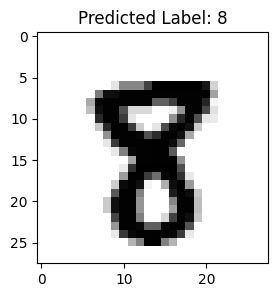

In [45]:
rand_image = x_test[np.random.randint(0, len(x_test))]
result = model.predict(rand_image)
plt.figure(figsize=(3, 3))
plt.title(f'Predicted Label: {result.item()}')
plt.imshow(rand_image.view(28, 28), cmap='gray_r')
plt.show()